# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

# Шаги исследования
1. Изучение данных.
2. Предобработка данных.
3. Добавление новых столбцов в таблицу.
4. Исследовательский анализ данных.
5. Общий вывод.

Цель проекта — выполнить предобработку данных и изучить их, чтобы найти интересные особенности и зависимости, которые существуют на рынке недвижимости.

## 1. Изучение данных

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv(r"C:\Users\stasf\Desktop\real_estate_data.csv", sep='\t')
data.info() # Изучим общую информацию о датафрейме

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [3]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


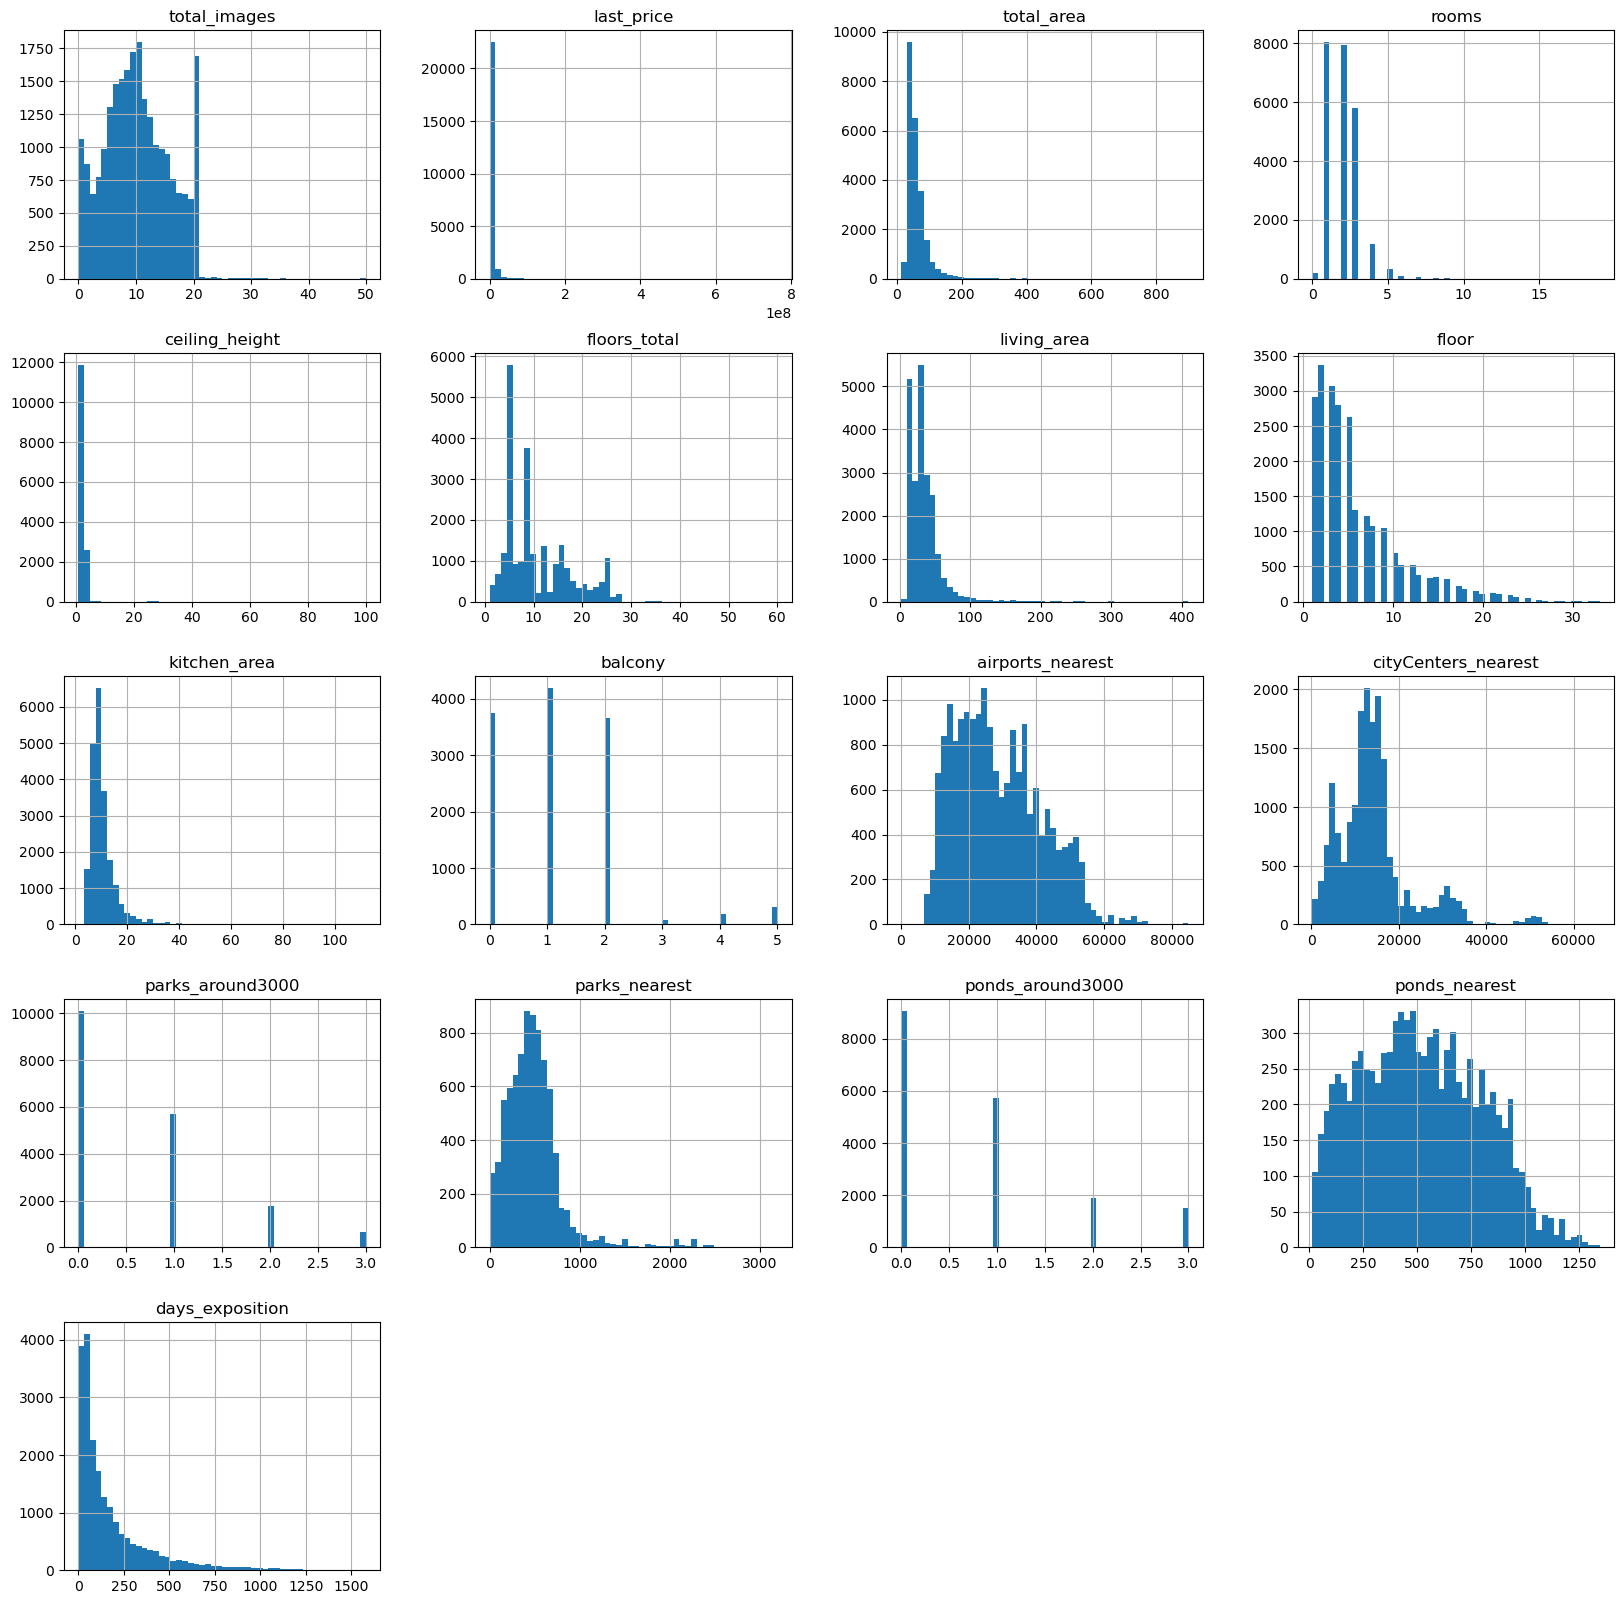

In [4]:
data.hist(figsize=(20, 20), bins=50) # Гистограмма для каждого столбца data
plt.show() 

**Вывод:**
- Выгрузили данные, изучили их;
- Построили гистограммы распределения для столбцов.

## 2. Предобработка данных

In [5]:
# Находим уникальные значения в столбце названий населенных пунктов - 'locality_name'
print(data['locality_name'].unique())
# Удаляем неявные дубликаты
for_delete = ['посёлок', 'городской посёлок', 'городской поселок', 'коттеджный посёлок', 'коттеджный поселок', 'посёлок городского типа', 'поселок городского типа', 'городской поселок']
for p in for_delete:
    data['locality_name'] = data['locality_name'].str.replace(p, 'поселок')
# Проверяем удаление неявных дубликатов
data['locality_name'].unique()

['Санкт-Петербург' 'посёлок Шушары' 'городской посёлок Янино-1'
 'посёлок Парголово' 'посёлок Мурино' 'Ломоносов' 'Сертолово' 'Петергоф'
 'Пушкин' 'деревня Кудрово' 'Коммунар' 'Колпино'
 'поселок городского типа Красный Бор' 'Гатчина' 'поселок Мурино'
 'деревня Фёдоровское' 'Выборг' 'Кронштадт' 'Кировск'
 'деревня Новое Девяткино' 'посёлок Металлострой'
 'посёлок городского типа Лебяжье' 'посёлок городского типа Сиверский'
 'поселок Молодцово' 'поселок городского типа Кузьмоловский'
 'садовое товарищество Новая Ропша' 'Павловск' 'деревня Пикколово'
 'Всеволожск' 'Волхов' 'Кингисепп' 'Приозерск' 'Сестрорецк'
 'деревня Куттузи' 'посёлок Аннино' 'поселок городского типа Ефимовский'
 'посёлок Плодовое' 'деревня Заклинье' 'поселок Торковичи'
 'поселок Первомайское' 'Красное Село' 'посёлок Понтонный' 'Сясьстрой'
 'деревня Старая' 'деревня Лесколово' 'посёлок Новый Свет' 'Сланцы'
 'село Путилово' 'Ивангород' 'Мурино' 'Шлиссельбург' 'Никольское'
 'Зеленогорск' 'Сосновый Бор' 'поселок Новый Све

array(['Санкт-Петербург', 'поселок Шушары', 'поселок Янино-1',
       'поселок Парголово', 'поселок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок Красный Бор', 'Гатчина', 'деревня Фёдоровское', 'Выборг',
       'Кронштадт', 'Кировск', 'деревня Новое Девяткино',
       'поселок Металлострой', 'поселок Лебяжье', 'поселок Сиверский',
       'поселок Молодцово', 'поселок Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'поселок Аннино',
       'поселок Ефимовский', 'поселок Плодовое', 'деревня Заклинье',
       'поселок Торковичи', 'поселок Первомайское', 'Красное Село',
       'поселок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', 'поселок Новый Свет', 'Сланцы',
       'село Путилово', 'Ивангород', 'Мурино', 'Шлиссельбург',
       'Никольское', 'Зелено

In [6]:
# Выявление пропусков в столбцах, их заполнение
print(data[data.isna() == False].count()) # 14 из 22 столбцов имеют пропуски

total_images            23699
last_price              23699
total_area              23699
first_day_exposition    23699
rooms                   23699
ceiling_height          14504
floors_total            23613
living_area             21796
floor                   23699
is_apartment             2775
studio                  23699
open_plan               23699
kitchen_area            21421
balcony                 12180
locality_name           23650
airports_nearest        18157
cityCenters_nearest     18180
parks_around3000        18181
parks_nearest            8079
ponds_around3000        18181
ponds_nearest            9110
days_exposition         20518
dtype: int64


In [7]:
columns_for_filling_null = ['balcony', 'is_apartment']

for col_1 in columns_for_filling_null:
    data[col_1] = data[col_1].fillna(0)

columns_for_filling_median = ['ceiling_height', 'airports_nearest', 'cityCenters_nearest', 'parks_nearest', 'ponds_nearest']

for col_2 in columns_for_filling_median:
    data[col_2] = data[col_2].fillna(data[col_2].median())

data['living_area'] = data['living_area'].fillna(data['total_area'])  # Пропуски заполнили значениями из столбца 'total_area'

1. Пропуски в столбце `'balcony'` - 'балкон' могут означать, что в квартире/апартаментах он отсуствует, поэтому мы заменили их на `0`.
2. Столбец `'is_apartment'` - 'апартаменты' - пропуски скорее всего означают, что данный тип недвижимости - квартира, а не апартамент. В доказательство могу привести такой факт: доля апартаментов из всей недвижимости Санкт-Петербурга составляет `9-10%` (данные на 2018 год, СМИ). Количество заполненных значений столбца `'is_apartment'` в исходных данных составляло около `2700` значений (`11,3%` от всех строк), из них 50 - апартаменты, остальное - квартиры. Отсюда вычисляем, что доля апартаментов составляет около `11%`: такая цифра, исходя из оценок СМИ выше, выглядит правдоподобно.
3. Остальные пропуски объясняются человеческим фактором и потерей данных при выгрузке. В связи с этим, пропуски в количественных значениях были заполнены медианными значениями каждого столбца соответственно (речь идет о столбцах: `'ceiling_height'`,  `'airports_nearest'`, `'cityCenters_nearest'`, `'parks_nearest'`, `'ponds_nearest'`). 


In [8]:
# Смотрим на тип данных каждого столбца
data.dtypes

total_images              int64
last_price              float64
total_area              float64
first_day_exposition     object
rooms                     int64
ceiling_height          float64
floors_total            float64
living_area             float64
floor                     int64
is_apartment             object
studio                     bool
open_plan                  bool
kitchen_area            float64
balcony                 float64
locality_name            object
airports_nearest        float64
cityCenters_nearest     float64
parks_around3000        float64
parks_nearest           float64
ponds_around3000        float64
ponds_nearest           float64
days_exposition         float64
dtype: object

In [9]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S') # Меняем тип данных даты публикации 
columns_for_retype_int32 = ['is_apartment', 'balcony', 'airports_nearest', 'cityCenters_nearest', 'ponds_nearest', 'parks_nearest', 'floor', 'rooms', 'total_images']
for col in columns_for_retype_int32: # Меняем тип данных некоторых столбцов на целочисленный
    data[col] = data[col].astype('int32')
columns_for_retype_float32 = ['total_area', 'ceiling_height', 'living_area', 'last_price', 'total_area']
for col2 in columns_for_retype_float32:
    data[col2] = data[col2].astype('float32')

In [10]:
# Проверка изменений    
data.dtypes

total_images                     int32
last_price                     float32
total_area                     float32
first_day_exposition    datetime64[ns]
rooms                            int32
ceiling_height                 float32
floors_total                   float64
living_area                    float32
floor                            int32
is_apartment                     int32
studio                            bool
open_plan                         bool
kitchen_area                   float64
balcony                          int32
locality_name                   object
airports_nearest                 int32
cityCenters_nearest              int32
parks_around3000               float64
parks_nearest                    int32
ponds_around3000               float64
ponds_nearest                    int32
days_exposition                float64
dtype: object

Тип данных в некоторых столбцах поменяли для:
1. Экономии памяти;
2. Оптимизации работы кода.

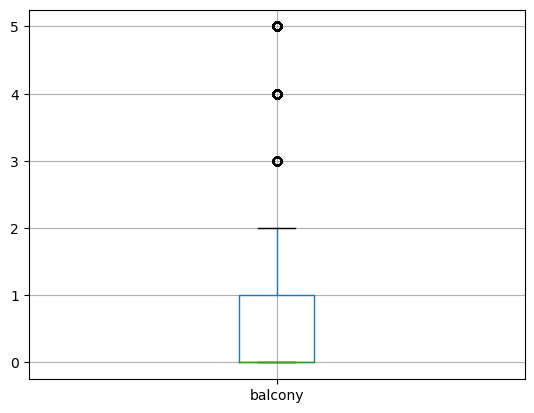

In [11]:
# Выявление аномальных значений 
data.boxplot(column='balcony')
data = data[data['balcony'] < 3] # Оставляем в датафрейме только те квартиры, у которых количество балконов меньше 3

In [12]:
print(data.shape)

(23131, 22)


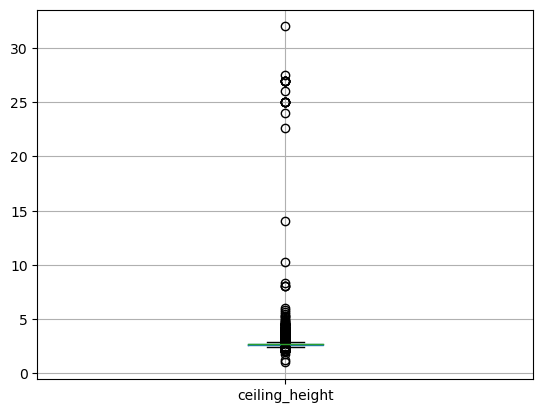

In [13]:
# Выявление аномалий
data.boxplot(column='ceiling_height') 
plt.show()

In [14]:
# Оставляем те квартиры, где высота потолков идет от 2.5 метров
data.loc[data['ceiling_height'] > 20, 'ceiling_height'] = data.loc[data['ceiling_height'] > 20, 'ceiling_height'] / 10 
data = data[(data['ceiling_height'] >= 2.5) & (data['ceiling_height'] < 5)]

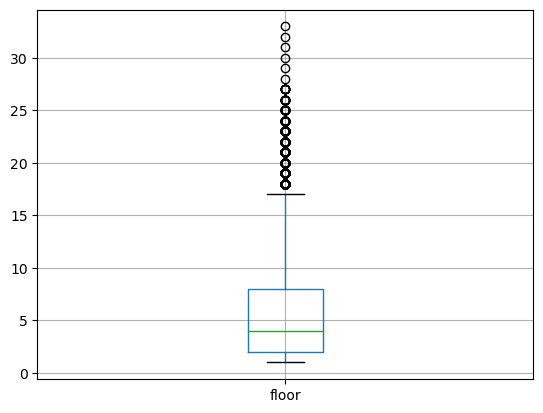

In [15]:
data.boxplot(column='floor')
plt.show()

count    20797.000000
mean        10.507239
std          5.808720
min          1.300000
25%          7.000000
50%          9.000000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64

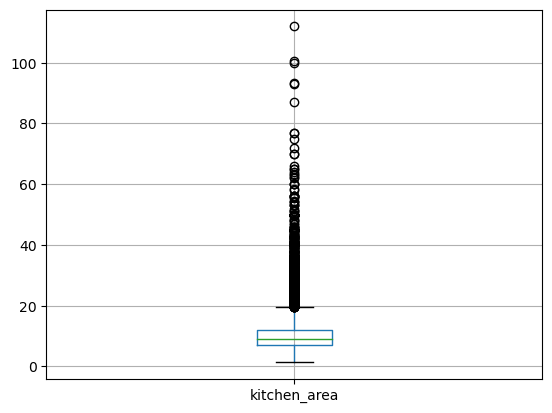

In [16]:
data.boxplot(column='kitchen_area') # Анамолий по площадям кухни нет
data['kitchen_area'].describe()

**Вывод:**
- Удалили неявные дубликаты в столбце `locality_name`;
- Заполнили пропуски в столбцах;
- Изменили типы данных некоторых столбцов для экономии памяти и корректной работы;
- Оставили только те квартиры, где высота потолков идет от `2.5` метров.

## 3. Добавление новых столбцов в таблицу

In [17]:
data['one_meter_price'] = data['last_price'] / data['total_area'] # Цена одного квадратного метра
data['day_of_the_week'] = data['first_day_exposition'].dt.dayofweek # День недели
data['month'] = data['first_day_exposition'].dt.month # Месяц публикации объявления
data['year'] = data['first_day_exposition'].dt.year # Год публикации объявления
def type_of_floor(floor, y): # Функция для определения типа этажа
    if floor == 1:
        return 'первый'
    if floor == y:
        return 'последний'
    else:
        return 'другой'
data['floor_type'] = data.apply(lambda floor: type_of_floor(floor['floor'], floor['floors_total']), axis =  1) # Тип этажа
data['cityCenters_nearest_km'] = round(data['cityCenters_nearest'] / 1000) # Расстояние до центра в км

In [18]:
data 

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,one_meter_price,day_of_the_week,month,year,floor_type,cityCenters_nearest_km
0,20,13000000.0,108.000000,2019-03-07,3,2.70,16.0,51.000000,8,0,...,482,2.0,755,NaN,120370.367188,3,3,2019,другой,16.0
1,7,3350000.0,40.400002,2018-12-04,1,2.65,11.0,18.600000,1,0,...,455,0.0,502,81.0,82920.789062,1,12,2018,первый,19.0
2,10,5196000.0,56.000000,2015-08-20,2,2.65,5.0,34.299999,4,0,...,90,2.0,574,558.0,92785.710938,3,8,2015,другой,14.0
3,0,64900000.0,159.000000,2015-07-24,3,2.65,14.0,159.000000,9,0,...,84,3.0,234,424.0,408176.093750,4,7,2015,другой,7.0
4,2,10000000.0,100.000000,2018-06-19,2,3.03,14.0,32.000000,13,0,...,112,1.0,48,121.0,100000.000000,1,6,2018,другой,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.809998,2017-03-21,3,3.70,5.0,73.300003,3,0,...,796,3.0,381,NaN,72490.843750,1,3,2017,другой,4.0
23695,14,3100000.0,59.000000,2018-01-15,3,2.65,5.0,38.000000,4,0,...,455,NaN,502,45.0,52542.371094,0,1,2018,другой,13.0
23696,18,2500000.0,56.700001,2018-02-11,2,2.65,3.0,29.700001,1,0,...,455,NaN,502,NaN,44091.710938,6,2,2018,первый,13.0
23697,13,11475000.0,76.750000,2017-03-28,2,3.00,17.0,76.750000,12,0,...,173,3.0,196,602.0,149511.406250,1,3,2017,другой,10.0


## 4. Исследовательский анализ данных

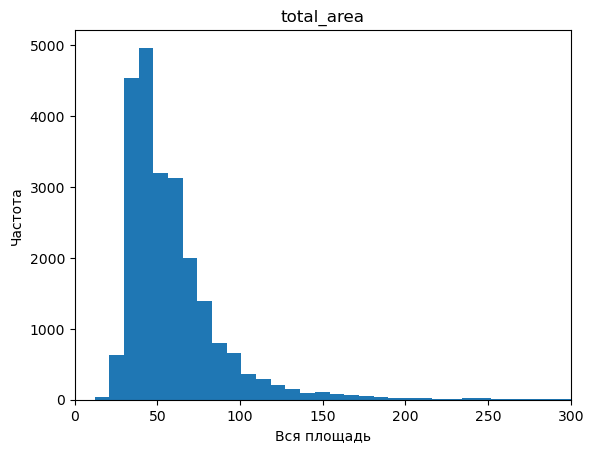

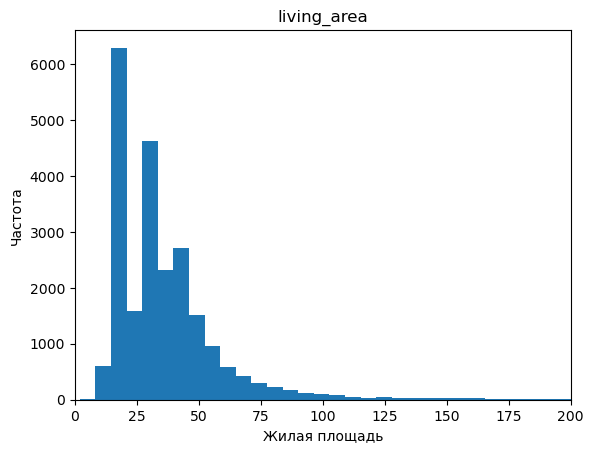

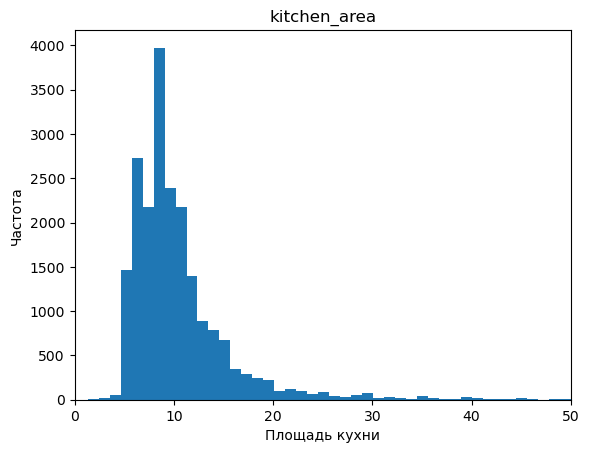

In [19]:
fig, ax = plt.subplots()
data['total_area'].plot(kind='hist', title='total_area', xlim=(0, 300), bins=100) # Гистограмма общей площади
ax.set_xlabel('Вся площадь')
ax.set_ylabel('Частота')
plt.show()
fig, ax = plt.subplots()
data['living_area'].plot(kind='hist', title='living_area', xlim=(0, 200), bins=100) # Гистограмма жилой площади
ax.set_xlabel('Жилая площадь')
ax.set_ylabel('Частота')
plt.show()
fig, ax = plt.subplots()
data['kitchen_area'].plot(kind='hist', title='kitchen_area', xlim=(0, 50), bins=100) # Гистограмма кухонной площади
ax.set_xlabel('Площадь кухни')
ax.set_ylabel('Частота')
plt.show()

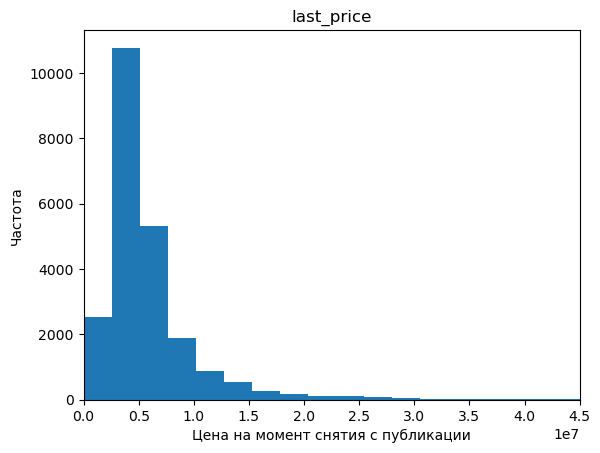

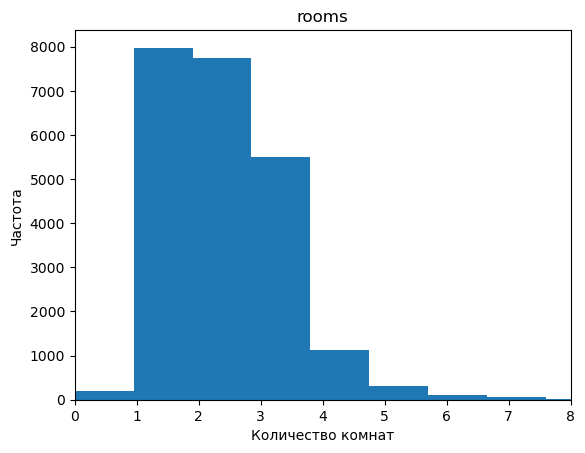

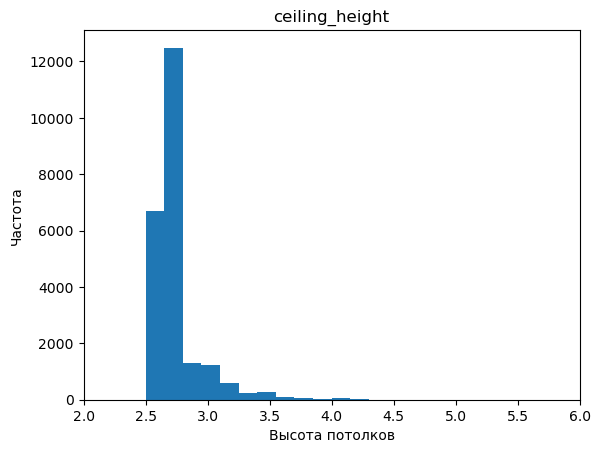

In [20]:
fig, ax = plt.subplots()
data['last_price'].plot(kind='hist', title='last_price', xlim=(0, 45000000), bins=300) # Гистограмма цен
ax.set_xlabel('Цена на момент снятия с публикации')
ax.set_ylabel('Частота')
plt.show()
fig, ax = plt.subplots()
data['rooms'].plot(kind='hist', title='rooms', xlim=(0, 8), bins=20) # Гистограмма количества комнат
ax.set_xlabel('Количество комнат')
ax.set_ylabel('Частота')
plt.show()
fig, ax = plt.subplots()
data['ceiling_height'].plot(kind='hist', title='ceiling_height', xlim=(2, 6), bins=16) # Гистограммы высот потолков
ax.set_xlabel('Высота потолков')
ax.set_ylabel('Частота')
plt.show()

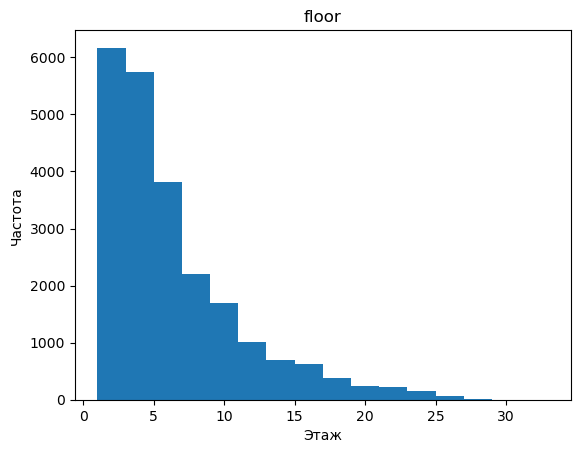

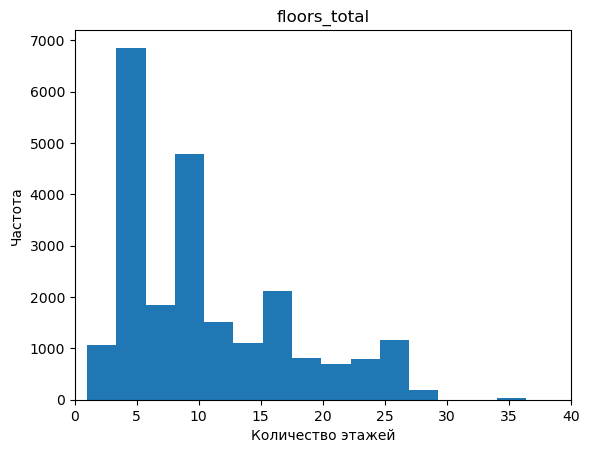

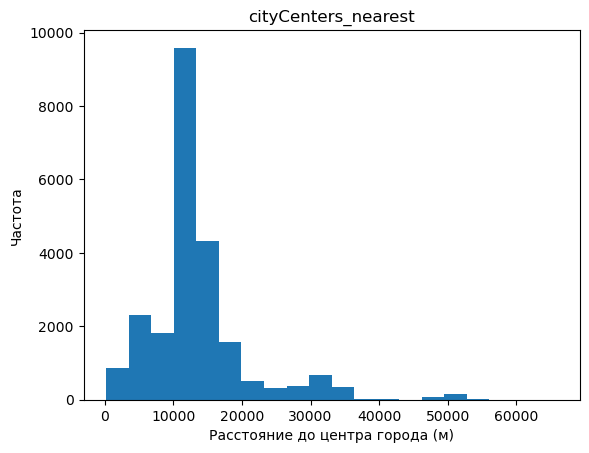

In [21]:
fig, ax = plt.subplots()
data['floor'].plot(kind='hist', title='floor', bins=16) # Этажи
ax.set_xlabel('Этаж')
ax.set_ylabel('Частота')
plt.show()
fig, ax = plt.subplots()
data['floors_total'].plot(kind='hist', title='floors_total', xlim=(0, 40), bins=25) # Гистограмма количества этажей
ax.set_xlabel('Количество этажей')
ax.set_ylabel('Частота')
plt.show()
fig, ax = plt.subplots()
data['cityCenters_nearest'].plot(kind='hist', title='cityCenters_nearest', bins=20) 
ax.set_xlabel('Расстояние до центра города (м)')
ax.set_ylabel('Частота')
plt.show()

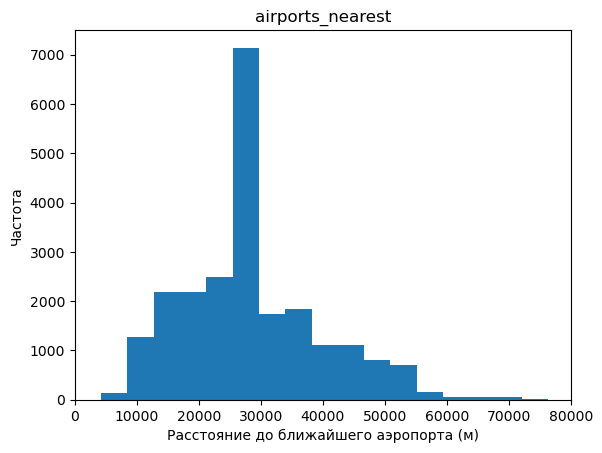

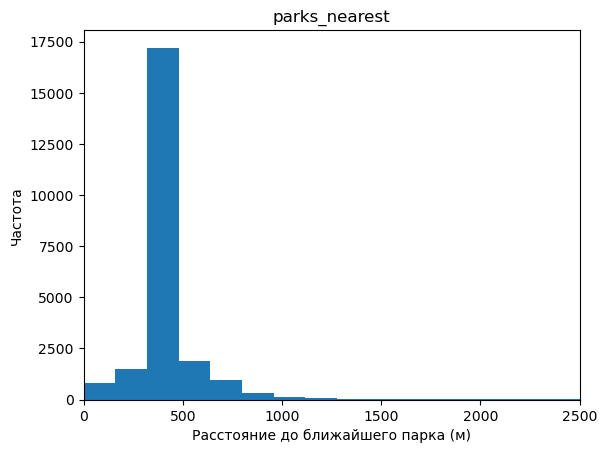

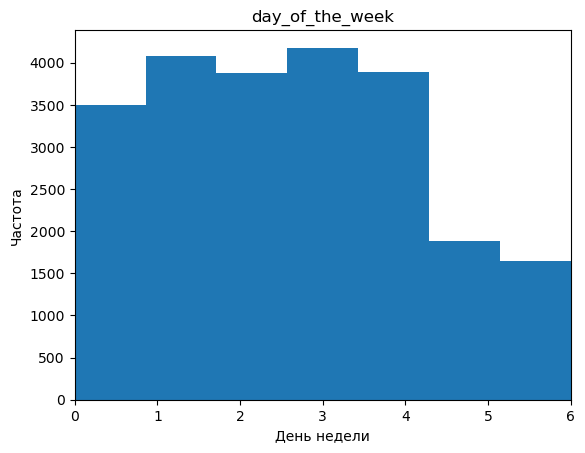

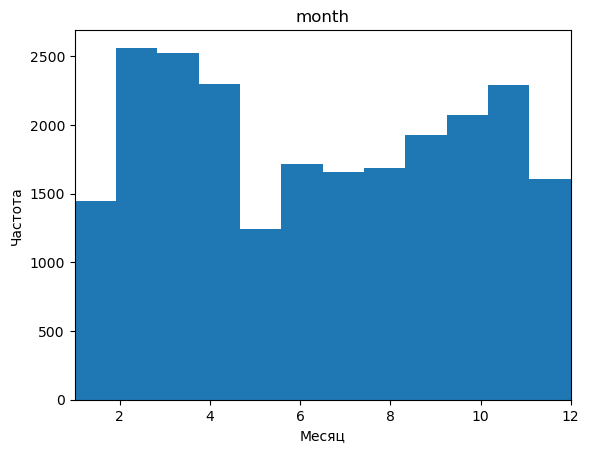

In [22]:
fig, ax = plt.subplots()
data['airports_nearest'].plot(kind='hist', title='airports_nearest', xlim=(0, 80000), bins=20)
ax.set_xlabel('Расстояние до ближайшего аэропорта (м)')
ax.set_ylabel('Частота')
plt.show()
fig, ax = plt.subplots()
data['parks_nearest'].plot(kind='hist', title='parks_nearest', xlim=(0, 2500), bins=20)
ax.set_xlabel('Расстояние до ближайшего парка (м)')
ax.set_ylabel('Частота')
plt.show()
fig, ax = plt.subplots()
data['day_of_the_week'].plot(kind='hist', title='day_of_the_week', xlim=(0, 6), bins=7)
ax.set_xlabel('День недели')
ax.set_ylabel('Частота')
plt.show()
fig, ax = plt.subplots()
data['month'].plot(kind='hist', title='month', xlim=(1, 12), bins=12)
ax.set_xlabel('Месяц')
ax.set_ylabel('Частота')
plt.show()

**Вывод:**
1. Почти половина квартир стоят от `2,5` до `5` миллионов рублей (около `11` тысяч предложений из `23` тысяч). 
2. Чем выше этаж, тем меньше предложений о покупке недвижимости.
3. Чем больше площадь, тем меньше предложений о покупке недвижимости.
4. Чем меньше комнат, тем меншье предложений о покупке недвижимости.
5. Подавляющее большинство предложений имеет парк в пешей доступности (расстояние - менее `500` метров).
6. В выходные дни люди менее склонны выставлять недвижимость на продажу.
7. Чаще всего высота потолков колеблется от `2,5` до `2,75` метров.

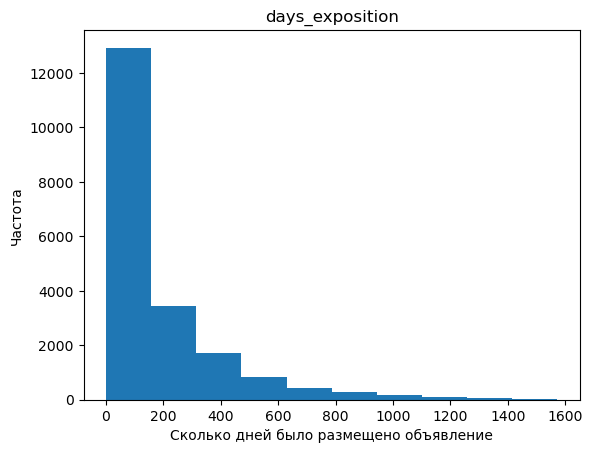

In [23]:
# Строим гистограмму для столбца days_exposition
fig, ax = plt.subplots()
data['days_exposition'].plot(kind='hist', title='days_exposition')
ax.set_xlabel('Сколько дней было размещено объявление')
ax.set_ylabel('Частота')
plt.show()

In [24]:
print(data['days_exposition'].median())
print(data['days_exposition'].mean())

95.0
180.775442809967


**Вывод:**
Обычно продажа недвижимости занимает до `5-6 месяцев`.
Самые быстрые продажи - `1-2 дня` (4 случая). Самые долгие продажи - `1572` дня (1 случай).

In [25]:
# Смотрим наличие выбросов
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,kitchen_area,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,one_meter_price,day_of_the_week,month,year,cityCenters_nearest_km
count,23046.000000,23046.0,23046.000000,23046.000000,23046.000000,22960.000000,23046.000000,23046.000000,23046.000000,20797.000000,...,17678.000000,23046.000000,17678.000000,23046.000000,19986.000000,2.304600e+04,23046.000000,23046.000000,23046.000000,23046.000000
mean,9.826217,6446574.5,59.812504,2.054543,2.696141,10.639329,36.446449,5.857068,0.001909,10.507239,...,0.609911,466.983381,0.770279,508.329341,180.775443,9.918855e+04,2.569773,6.402456,2017.364836,13.895079
std,5.661413,10534745.0,35.292702,1.077722,0.214930,6.595888,25.634356,4.866984,0.043654,5.808720,...,0.802706,200.138496,0.937792,172.367777,219.875626,4.959018e+04,1.787196,3.490397,1.040438,7.574209
min,0.000000,12190.0,12.000000,0.000000,2.500000,1.000000,2.000000,1.000000,0.000000,1.300000,...,0.000000,1.000000,0.000000,13.000000,1.000000,1.118349e+02,0.000000,1.000000,2014.000000,0.000000
25%,6.000000,3400000.0,40.000000,1.000000,2.600000,5.000000,19.000000,2.000000,0.000000,7.000000,...,0.000000,455.000000,0.000000,502.000000,45.000000,7.665795e+04,1.000000,3.000000,2017.000000,11.000000
50%,9.000000,4600000.0,51.299999,2.000000,2.650000,9.000000,31.000000,4.000000,0.000000,9.000000,...,0.000000,455.000000,1.000000,502.000000,95.000000,9.491526e+04,3.000000,6.000000,2017.000000,13.000000
75%,14.000000,6700000.0,68.900002,3.000000,2.700000,16.000000,43.900002,8.000000,0.000000,12.000000,...,1.000000,455.000000,1.000000,502.000000,231.000000,1.140000e+05,4.000000,10.000000,2018.000000,15.000000
max,50.000000,763000000.0,900.000000,19.000000,4.900000,60.000000,631.000000,33.000000,1.000000,112.000000,...,3.000000,3190.000000,3.000000,1344.000000,1572.000000,1.907500e+06,6.000000,12.000000,2019.000000,66.000000


,last_price,total_area,rooms,cityCenters_nearest
last_price,1.000000,0.654088,0.366740,-0.194301
total_area,0.654088,1.000000,0.759354,-0.214660
rooms,0.366740,0.759354,1.000000,-0.165500
cityCenters_nearest,-0.194301,-0.214660,-0.165500,1.000000


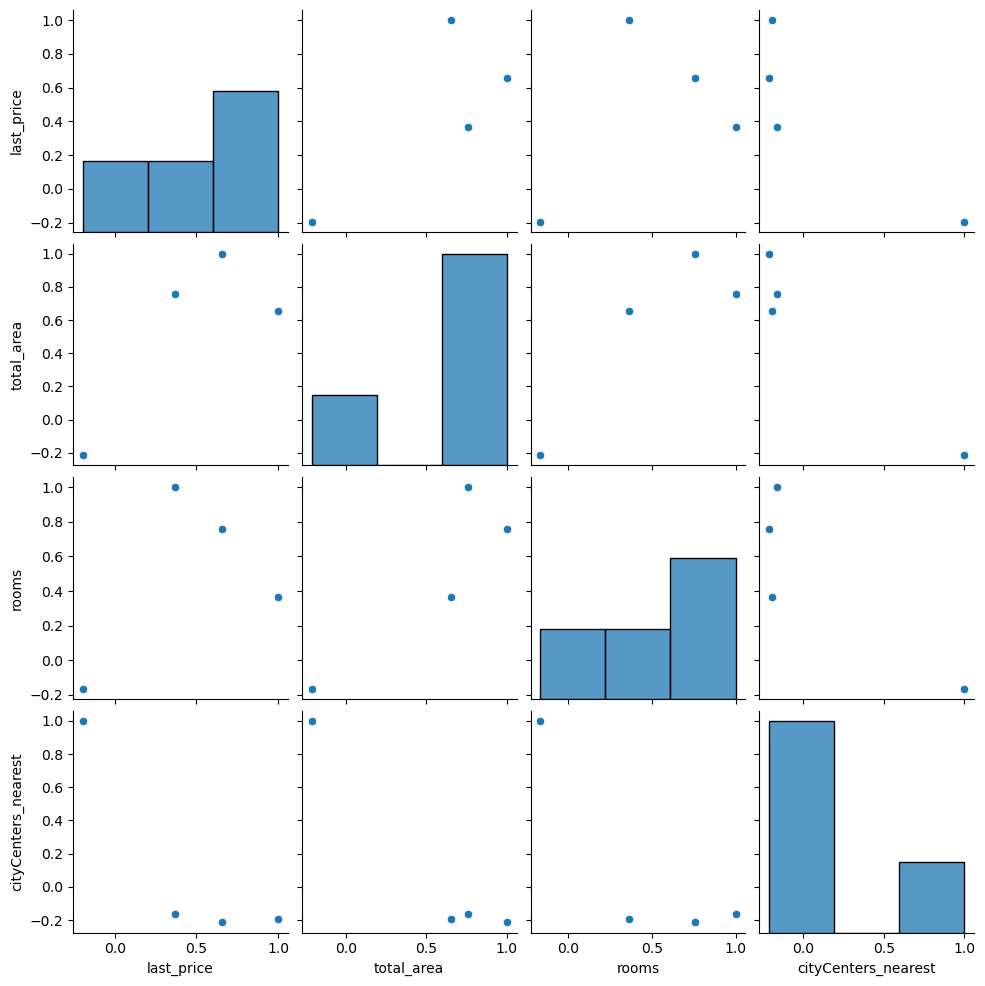

In [26]:
# Нахождения факторов, которые больше всего влияют на общую (полную) стоимость объекта.
corr = data[['last_price', 'total_area', 'rooms', 'cityCenters_nearest']].corr()
sns.pairplot(corr)
corr

1. Между `ценой` и `общей площадью` существует корреляция (коэффициент Пирсона = `0.65). 
2. Между `ценой` и `количеством комнат` корреляция довольно невелика (коэффициент Пирсона = `0.37`).
3. Между `ценой` и `расстоянием до центра города` корреляция очень мала (коэффициент Пирсона = `-0.19`).

**Вывод:**
`Цена` больше всего зависит от `общей площади недвижимости`, и практически не зависит от `количества комнат в квартире/апартаментах`. Это значит, что в `квартире/апартаментах` может быть `1` или `2` комнаты, но если `общая площадь` будет велика, то и `цена` будет соответственно выше. Между `ценой` и `расстоянием до центра города`прямой зависимости нет.

In [27]:
data['sm_price'] = data['last_price'] / data['total_area'] # Создаем столбец со средней ценой кв. метра
data['sm_price'] = data['sm_price'].astype(int)
city_ten = data['locality_name'].value_counts().head(10) # Находим 10 самых популярных населенных пунктов 
city_sm_price = data.query('locality_name in (@city_ten.index)').pivot_table(values='sm_price', index='locality_name')
city_sm_price = city_sm_price.astype(int)
city_sm_price.sort_values('sm_price', ascending=False)

,sm_price
locality_name,
Санкт-Петербург,114503
Пушкин,102720
деревня Кудрово,92706
поселок Парголово,90205
поселок Мурино,85776
поселок Шушары,78879
Колпино,75286
Всеволожск,68771
Гатчина,68640


**Вывод:**
Самый дорогой квадратный метр - в `Санкт-Петербурге `(стоимость кв. метра составляет `114 503 рублей`), самый дешёвый квадратный метр - в `Выборге` (`58 352 рублей`).

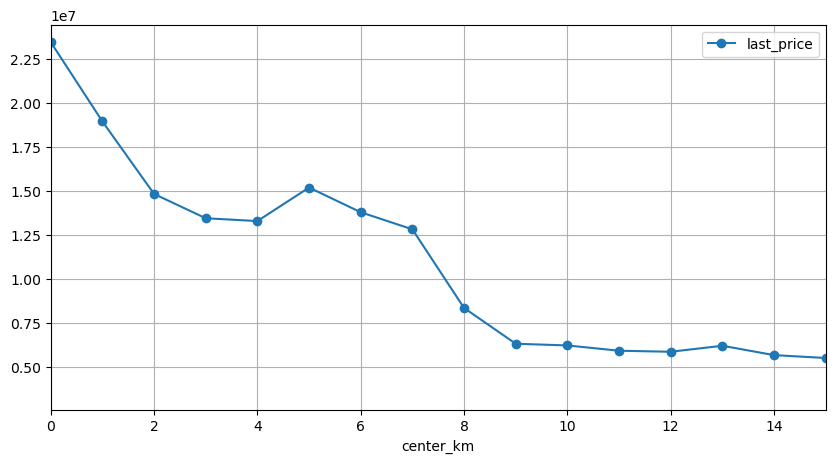

In [28]:
# Добавляем столбец с расстоянием до центра в км, округляем до целого
data['center_km'] = data['cityCenters_nearest'] / 1000
data['center_km'] = data['center_km'].fillna(value=0).astype(int)
# Выбираем Санкт-Петербург, смотрим на график, где указана средняя стоимость для каждого км
(
    data.query('locality_name == "Санкт-Петербург"')
    .pivot_table(index='center_km', values='last_price')
    .plot(grid=True, style='o-', xlim=(0,15), figsize=(10, 5))
)
plt.show()

**Вывод:**
Центром города является окружность радиусом *7 км*. На расстоянии *0-2 км* `цена` растет линейно с приближением к центру, на расстояние *2-4 км* линия роста `цены` становится более плавной. Если подытожить, то можно отметить, что с приближением к центру `цена` возрастает. 

### Общий вывод

1. Были найдены и изучены пропуски в данных: постарался определить их природу, по возможности заполнил данные либо `0` (например, в столбце `'balcony'`), либо медианными значениями по каждому столбцу.
2. Исключил неявные дубликаты. Они скрывались в названиях населенных пунктов (столбец `'locality_name'`). 
3. Для исследовательского анализа были добавлены новые столбцы: `цена одного квадратного метра`, `день недели публикации объявления` (0 — понедельник, 1 — вторник и так далее), `месяц публикации объявления`, `год публикации объявления`, `тип этажа квартиры` (значения — «первый», «последний», «другой»), `расстояние до центра города в километрах` (переведите из м в км и округлите до целых значений).

Был проведен исследовательский анализ данных, и вот какие **выводы** получились:
1. В основном квартиру продают за `3-4 месяца`. Бывают случаи, когда квартиру удается продать за считанные дни. Но также есть случаи с продажей через `2-3 года`.
2. Множество квартир, выставленных на продажу, располагаются на первых этажах. С возратсанием этажей убывает количество предложений.
3. Самые дорогой квадратный метр, ожидаемо, в `Санкт-Петербуге` - `114218 рублей`. Самый дешевый квадратный метр в `Выборге` - `58365 рублей`. 
4. В центральной части города квартиры, располагающиеся в промежутке от `2 до 5 км` до центра города, не имеют особой разности в цене. Когда квартиры располагаются меньше чем `2 км` до центра, их цена начинает резко возрастать.